# Introduction to Linear and Differnetial Cryptanalysis
## Intro
In this practical we will implement the attacks that were discussed during lectures on round reduced DES, you will then perform these attacks on other cryptosystems.

## Reminder of Differential cryptanalysis

## SBox calculations
The first step of the attack is to calculate the differential characteristics for every possible set of differences, i.e. for every possible input difference to the SBox and every possible output difference from the SBox, we want to calulate the probablity of the output difference occouring, given that the input difference occoured. 

For this example we will use S_1 from DES.

|S1	|x0000x	|x0001x	|x0010x	|x0011x	|x0100x	|x0101x	|x0110x	|x0111x	|x1000x	|x1001x	|x1010x	|x1011x	|x1100x	|x1101x	|x1110x	|x1111x |
| ---| ---| ---| ---| ---| ---| ---| --- | ---| ---| ---| ---| ---| ---| ---| --- | --- |
|0yyyy0	|14	|4	|13	|1	|2	|15	|11	|8	|3	|10	|6	|12	|5	|9	|0	|7|
|0yyyy1	|0	|15	|7	|4	|14	|2	|13	|1	|10	|6	|12	|11	|9	|5	|3	|8|
|1yyyy0	|4	|1	|14	|8	|13	|6	|2	|11	|15	|12	|9	|7	|3	|10	|5	|0|
|1yyyy1	|15	|12	|8	|2	|4	|9	|1	|7	|5	|11	|3	|14	|10	|0	|6	|13|

## Question 1
### Generate tables showing how many times each output difference occurs for each input difference


In [1]:
S= [
   [[14,4,13,1,2,15,11,8,3,10,6,12,5,9,0,7],[0,15,7,4,14,2,13,1,10,6,12,11,9,5,3,8],[4,1,14,8,13,6,2,11,15,12,9,7,3,10,5,0],[15,12,8,2,4,9,1,7,5,11,3,14,10,0,6,13]],
   [[15,1,8,14,6,11,3,4,9,7,2,13,12,0,5,10],[3,13,4,7,15,2,8,14,12,0,1,10,6,9,11,5],[0,14,7,11,10,4,13,1,5,8,12,6,9,3,2,15],[13,8,10,1,3,15,4,2,11,6,7,12,0,5,14,9]],
   [[10,0,9,14,6,3,15,5,1,13,12,7,11,4,2,8],[13,7,0,9,3,4,6,10,2,8,5,14,12,11,15,1],[13,6,4,9,8,15,3,0,11,1,2,12,5,10,14,7],[1,10,13,0,6,9,8,7,4,15,14,3,11,5,2,12]],
   [[7,13,14,3,0,6,9,10,1,2,8,5,11,12,4,15],[13,8,11,5,6,15,0,3,4,7,2,12,1,10,14,9],[10,6,9,0,12,11,7,13,15,1,3,14,5,2,8,4],[3,15,0,6,10,1,13,8,9,4,5,11,12,7,2,14]],
   [[2,12,4,1,7,10,11,6,8,5,3,15,13,0,14,9],[14,11,2,12,4,7,13,1,5,0,15,10,3,9,8,6],[4,2,1,11,10,13,7,8,15,9,12,5,6,3,0,14],[11,8,12,7,1,14,2,13,6,15,0,9,10,4,5,3]],
   [[12,1,10,15,9,2,6,8,0,13,3,4,14,7,5,11],[10,15,4,2,7,12,9,5,6,1,13,14,0,11,3,8],[9,14,15,5,2,8,12,3,7,0,4,10,1,13,11,6],[4,3,2,12,9,5,15,10,11,14,1,7,6,0,8,13]], 
   [[4,11,2,14,15,0,8,13,3,12,9,7,5,10,6,1],[13,0,11,7,4,9,1,10,14,3,5,12,2,15,8,6],[1,4,11,13,12,3,7,14,10,15,6,8,0,5,9,2],[6,11,13,8,1,4,10,7,9,5,0,15,14,2,3,12]],
   [[13,2,8,4,6,15,11,1,10,9,3,14,5,0,12,7],[1,15,13,8,10,3,7,4,12,5,6,11,0,14,9,2],[7,11,4,1,9,12,14,2,0,6,10,13,15,3,5,8],[2,1,14,7,4,10,8,13,15,12,9,0,3,5,6,11]] 
]

def diff_approx_table(sbox):
    table = [ [0]*(2**4) for i in range(2**6)]
    
    #populate the table!
    for a in range(2**6):
        for b in range(2**6):
            in_diff = a^b
            a_r = 2*(a//(2**5)) + (a%2)
            a_c = (a//2)%(2**4)
            b_r = 2*(b//(2**5)) + (b%2)
            b_c = (b//2)%(2**4)
            a_o = sbox[a_r][a_c]
            b_o = sbox[b_r][b_c]
            out_diff = a_o^b_o
            table[in_diff][out_diff] +=1
    return table
tbl = diff_approx_table(S[0])
print(tbl)

[[64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 2, 4, 4, 0, 10, 12, 4, 10, 6, 2, 4], [0, 0, 0, 8, 0, 4, 4, 4, 0, 6, 8, 6, 12, 6, 4, 2], [14, 4, 2, 2, 10, 6, 4, 2, 6, 4, 4, 0, 2, 2, 2, 0], [0, 0, 0, 6, 0, 10, 10, 6, 0, 4, 6, 4, 2, 8, 6, 2], [4, 8, 6, 2, 2, 4, 4, 2, 0, 4, 4, 0, 12, 2, 4, 6], [0, 4, 2, 4, 8, 2, 6, 2, 8, 4, 4, 2, 4, 2, 0, 12], [2, 4, 10, 4, 0, 4, 8, 4, 2, 4, 8, 2, 2, 2, 4, 4], [0, 0, 0, 12, 0, 8, 8, 4, 0, 6, 2, 8, 8, 2, 2, 4], [10, 2, 4, 0, 2, 4, 6, 0, 2, 2, 8, 0, 10, 0, 2, 12], [0, 8, 6, 2, 2, 8, 6, 0, 6, 4, 6, 0, 4, 0, 2, 10], [2, 4, 0, 10, 2, 2, 4, 0, 2, 6, 2, 6, 6, 4, 2, 12], [0, 0, 0, 8, 0, 6, 6, 0, 0, 6, 6, 4, 6, 6, 14, 2], [6, 6, 4, 8, 4, 8, 2, 6, 0, 6, 4, 6, 0, 2, 0, 2], [0, 4, 8, 8, 6, 6, 4, 0, 6, 6, 4, 0, 0, 4, 0, 8], [2, 0, 2, 4, 4, 6, 4, 2, 4, 8, 2, 2, 2, 6, 8, 8], [0, 0, 0, 0, 0, 0, 2, 14, 0, 6, 6, 12, 4, 6, 8, 6], [6, 8, 2, 4, 6, 4, 8, 6, 4, 0, 6, 6, 0, 4, 0, 0], [0, 8, 4, 2, 6, 6, 4, 6, 6, 4, 2, 6, 6, 0, 4, 0], [2, 4, 4, 6, 2, 0, 4, 6, 2,

## Question 2
### Which differential pairs have the highest probability of occuring?

In [30]:
#You may want to write some code to process the approx tabes
probs = []
for i in range(len(tbl)):
    for j in range(len(tbl[i])):
        if i == 0:
            continue
        probs.append([i,j,tbl[i][j]])
probs.sort(reverse = True, key=lambda x: x[2])
#print(probs[:20])

## Differential cryptanalysis (Example)
We start by considering a version of DES which only has **6** rounds, and we remove the permutation before the first round and the permutation after the last round.
Example probability calculation:
i) Given an input difference (in hex) of '00 80 82 00  60 00 00 00', what is the most likely output difference after three rounds, and what is the probability of it occurring.

The input difference to the first round function is '60 00 00 00'.
After applying the expansion function we have an output difference of '30 00 00 00 00 00'. 
The input difference to SBox 1 is 'C', the input difference to all other SBoxes is 0.
The most likely output difference for SBox 1 with an input difference of 'C' is 'E', and occurs with probability 14/64.
This gives an output difference from the SBoxes of 'E0 00 00 00'.
After applying the permutation the output difference is '00 80 82 00'.

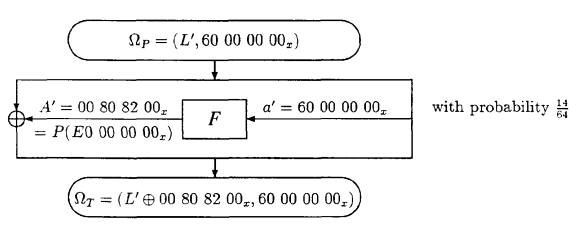

The input difference to the second round function is '00 00 00 00'.
After applying the expansion function we have an output difference of '00 00 00 00 00 00'. 
The input difference to all SBoxes is 0.
This gives an output difference from the SBoxes of '00 00 00 00'.
After applying the permutation the output difference is '00 00 00 00'.

The input difference to the third round function is '60 00 00 00'.
After applying the expansion function we have an output difference of '30 00 00 00 00 00'. 
The input difference to SBox 1 is 'C', the input difference to all other SBoxes is 0.
The most likely output difference for SBox 1 with an input difference of 'C' is 'E', and occurs with probability 14/64.
This gives an output difference from the SBoxes of 'E0 00 00 00'.
After applying the permutation the output difference is '00 80 82 00'.

The output difference after 3 rounds will be '00 80 82 00  60 00 00 00', as will occur with probablity $\frac{49}{1024}$
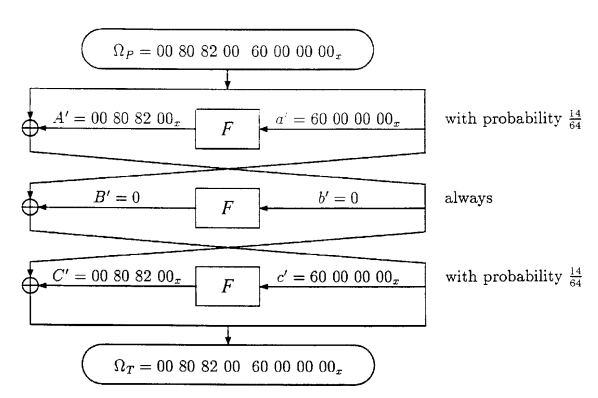

## Question 3
### For the following input differences, what is the most likely output difference after three rounds, and what is the probability of it occurring?

a) '40 08 00 00  04 00 00 00'

b) '00 20 00 08  00 00 04 00'


## This section is an implementation of DES

In [2]:

import random
Gkey = random.randint(0,2**64)
round6key = 0
ip = [57, 49, 41, 33, 25, 17, 9, 1, 59, 51, 43, 35, 27, 19, 11, 3, 61, 53, 45, 37, 29, 21, 13, 5, 63, 55, 47, 39, 31, 23, 15, 7, 56, 48, 40, 32, 24, 16, 8, 0, 58, 50, 42, 34, 26, 18, 10, 2, 60, 52, 44, 36, 28, 20, 12, 4, 62, 54, 46, 38, 30, 22, 14, 6]
iip = [39, 7, 47, 15, 55, 23, 63, 31, 38, 6, 46, 14, 54, 22, 62, 30, 37, 5, 45, 13, 53, 21, 61, 29, 36, 4, 44, 12, 52, 20, 60, 28, 35, 3, 43, 11, 51, 19, 59, 27, 34, 2, 42, 10, 50, 18, 58, 26, 33, 1, 41, 9, 49, 17, 57, 25, 32, 0, 40, 8, 48, 16, 56, 24]
rpi = [15, 6, 19, 20, 28, 11, 27, 16, 0, 14, 22, 25, 4, 17, 30, 9, 1, 7, 23, 13, 31, 26, 2, 8, 18, 12, 29, 5, 21, 10, 3, 24]
irpi = [8, 16, 22, 30, 12, 27, 1, 17, 23, 15, 29, 5, 25, 19, 9, 0, 7, 13, 24, 2, 3, 28, 10, 18, 31, 11, 21, 6, 4, 26, 14, 20]
pc1 = [56, 48, 40, 32, 24, 16, 8, 0, 57, 49, 41, 33, 25, 17, 9, 1, 58, 50, 42, 34, 26, 18, 10, 2, 59, 51, 43, 35, 62, 54, 46, 38, 30, 22, 14, 6, 61, 53, 45, 37, 29, 21, 13, 5, 60, 52, 44, 36, 28, 20, 12, 4, 27, 19, 11, 3]
pc2 = [13, 16, 10, 23, 0, 4, 2, 27, 14, 5, 20, 9, 22, 18, 11, 3, 25, 7, 15, 6, 26, 19, 12, 1, 40, 51, 30, 36, 46, 54, 29, 39, 50, 44, 32, 47, 43, 48, 38, 55, 33, 52, 45, 41, 49, 35, 28, 31]
e = [31, 0, 1, 2, 3, 4, 3, 4, 5, 6, 7, 8, 7, 8, 9, 10, 11, 12, 11, 12, 13, 14, 15, 16, 15, 16, 17, 18, 19, 20, 19, 20, 21, 22, 23, 24, 23, 24, 25, 26, 27, 28, 27, 28, 29, 30, 31, 0]
S= [
   [[14,4,13,1,2,15,11,8,3,10,6,12,5,9,0,7],[0,15,7,4,14,2,13,1,10,6,12,11,9,5,3,8],[4,1,14,8,13,6,2,11,15,12,9,7,3,10,5,0],[15,12,8,2,4,9,1,7,5,11,3,14,10,0,6,13]],
   [[15,1,8,14,6,11,3,4,9,7,2,13,12,0,5,10],[3,13,4,7,15,2,8,14,12,0,1,10,6,9,11,5],[0,14,7,11,10,4,13,1,5,8,12,6,9,3,2,15],[13,8,10,1,3,15,4,2,11,6,7,12,0,5,14,9]],
   [[10,0,9,14,6,3,15,5,1,13,12,7,11,4,2,8],[13,7,0,9,3,4,6,10,2,8,5,14,12,11,15,1],[13,6,4,9,8,15,3,0,11,1,2,12,5,10,14,7],[1,10,13,0,6,9,8,7,4,15,14,3,11,5,2,12]],
   [[7,13,14,3,0,6,9,10,1,2,8,5,11,12,4,15],[13,8,11,5,6,15,0,3,4,7,2,12,1,10,14,9],[10,6,9,0,12,11,7,13,15,1,3,14,5,2,8,4],[3,15,0,6,10,1,13,8,9,4,5,11,12,7,2,14]],
   [[2,12,4,1,7,10,11,6,8,5,3,15,13,0,14,9],[14,11,2,12,4,7,13,1,5,0,15,10,3,9,8,6],[4,2,1,11,10,13,7,8,15,9,12,5,6,3,0,14],[11,8,12,7,1,14,2,13,6,15,0,9,10,4,5,3]],
   [[12,1,10,15,9,2,6,8,0,13,3,4,14,7,5,11],[10,15,4,2,7,12,9,5,6,1,13,14,0,11,3,8],[9,14,15,5,2,8,12,3,7,0,4,10,1,13,11,6],[4,3,2,12,9,5,15,10,11,14,1,7,6,0,8,13]], 
   [[4,11,2,14,15,0,8,13,3,12,9,7,5,10,6,1],[13,0,11,7,4,9,1,10,14,3,5,12,2,15,8,6],[1,4,11,13,12,3,7,14,10,15,6,8,0,5,9,2],[6,11,13,8,1,4,10,7,9,5,0,15,14,2,3,12]],
   [[13,2,8,4,6,15,11,1,10,9,3,14,5,0,12,7],[1,15,13,8,10,3,7,4,12,5,6,11,0,14,9,2],[7,11,4,1,9,12,14,2,0,6,10,13,15,3,5,8],[2,1,14,7,4,10,8,13,15,12,9,0,3,5,6,11]] 
]


def perm(inpt,pi):
    out='0b'
    for i in pi:
        if i == "-":
            out += "-"
        else:
            out += inpt[i+2]
    return out


def sbox(in6,i):
    row = int(in6[0] + in6[5],2)
    col = int(in6[1:5],2)
    out = S[i][row][col]
    return format(out, '04b')

def shift(key,r):
    if r in [1,2,9,16]:
        keyp = key[:2] + key[3:] + key[2]
    else:
        keyp = key[:2] + key[4:] + key[2:4]
    return keyp
     
def f(k,r,p=False):
    rp = perm(r,e) #apply E to right
    rp = int(rp,2)^k #xor with key
    rp = format(rp, '#050b')
    rpp = '0b'
    for j in range(8):
        rpp += sbox(rp[2+j*6:8+j*6],j) #apply SBoxes
    rpp = perm(rpp,rpi) #apply round permutation
    rp = int(rpp,2)
    return rp
def DES_encrypt(key,pt,rounds=16):
    l2,r2 = 0,0
    sbkey = perm(format(key,'#066b'),pc1) #applies PC1 to the key 
    l = format(pt//(2**32), '#034b')#split plain text into left and right
    r = format(pt%(2**32), '#034b')
    kl = sbkey[:30] #split key into left and right
    kr = '0b' + sbkey[30:]
    for i in range(rounds):
        kl = shift(kl,i+1) #rotate the left key
        kr = shift(kr,i+1) #rotate the right key
        k = perm(kl + kr[2:],pc2) #generate the round key
        lp = r #the left input to the next round
        k = int(k,2)
        rp = f(k,r)
        if i==2:
            l2 = lp
            r2 = rp
        rp = rp ^ int(l,2) #xor with left input 
        (l,r) = (lp,format(rp, '#034b'))
    return (int(l2,2),r2,int(r,2)*(2**32)+int(l,2))




## Performing the attack
We'll start by using the first differential above, 00 80 82 00 60 00 00 00 -> 60 00 00 00 00 80 82 00, we'll use the below diagram for notation.
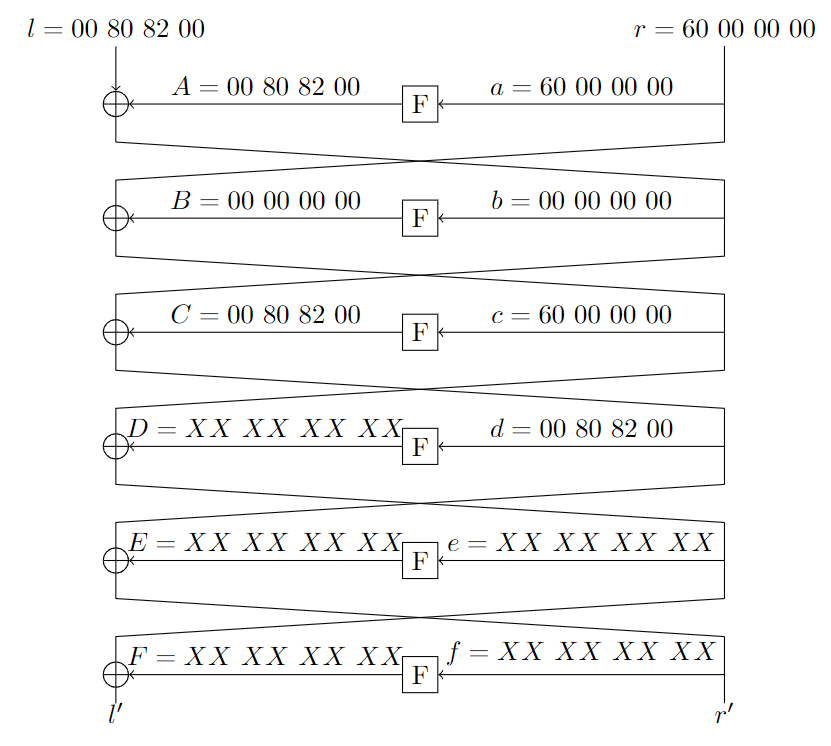

We know that if we choose two plaintexts with a difference of 00 80 82 00 60 00 00 00, then with probability $\frac{49}{1024}$ the difference at $d$ will be 00 80 82 00. Applying the expansion to this, we see that the differences in the inputs to the 1st, 7th, 8th SBoxes will be 0 - which means that the output differences will be 0. Applying the permutation we see that the 5th, 7th, 9th, 12th, 15th, 17th, 21-23rd and 27th bits of $D$ will have a difference of 0 (with probablity $\frac{49}{1024}$).  
XORing $D$ with $c$ gives us $e$.

As we have the ciphertexts, we compute compute $F = c\oplus D\oplus l'$ for a pair, and then try all $2^{18}$ possible key bits (that relate to SBoxes 1, 7 and 8), if a key works we increment its counter by one. We repeat this for all our pairs.

Complete the code below to perform the attack

In [28]:
def get_round_key(key):
    sbkey = perm(format(key,'#066b'),pc1) #applies PC1 to the key 
    kl = sbkey[:30] #split key into left and right
    kr = '0b' + sbkey[30:]
    for i in range(6):
        kl = shift(kl,i+1) #rotate the left key
        kr = shift(kr,i+1) #rotate the right key
        k = perm(kl + kr[2:],pc2) #generate the round key
    return int(k,2)

#Code goes here
Gkey = int("0110100001111101000110011110110101110110011011010001010100010111",2)
round_k = bin(get_round_key(Gkey))

n = 2**8 #number of plaintext/ciphertext pair
inDiff = 36171735141187584 #00 80 82 00 60 00 00 00 as an int
subkey_list = []
for i in range(2**18): #all possible 2^18 key bits
    subkey_list.append([i,0])

#this section is to speed things up - in reality we can't do this, and so the pair only works with prob 49/1024
cdiff = 1610612736
Cdiff = 8421888
pairs = []
for pair in range(n):
    p1 = random.randint(0,2**64)
    p2 = p1^inDiff
    (c1,C1,ct1) = DES_encrypt(Gkey,p1,6)
    (c2,C2,ct2) = DES_encrypt(Gkey,p2,6)
    if c1^c2 == cdiff and C1^C2 == Cdiff:
        pairs.append([p1,p2])

print("len pairs:",len(pairs))
for i in range(len(pairs)):#range(n):
    print(i," of ",len(pairs))
    (p1,p2) = pairs[i]
    print(p1,p2)
    _,_,ct1 = DES_encrypt(Gkey,p1,6)
    _,_,ct2 = DES_encrypt(Gkey,p2,6)
    print(ct1,ct2)
    outDiff = ct1^ct2
    #if pair%(n//1000) == 0: print("Attack progress: " + str(round(pair*100/n,1)) + "%")
    lp1 = ct1//(2**32)
    lp2 = ct2//(2**32)
    rp1 = ct1%(2**32)
    rp2 = ct2%(2**32)
    lp = outDiff//(2**32)
    rp = outDiff%(2**32)
    D = 177376803
    for i in range(2**18):
        key = format(i,"#020b")
        key = int(key[0:8] + "000000000000000000000000000000" + key[8:],2)
        F1 = f(key,format(rp1,'#034b'),True)
        F2 = f(key,format(rp2,'#034b'),True)
        Fp = (F1^F2)
        if Fp&D == lp&D: #then we have a candidate key!
            #print(i," is a candidate key")
            subkey_list[i][1] +=1


sort_list = sorted(subkey_list, key=lambda x:x[1],reverse=True)
print(sort_list[:10])
print("Our subkey bits were:")
print(bin(sort_list[0][0]),sort_list[0][0])
print("They should have been:")
print(print(round_k[2:8]+round_k[-12:]))



len pairs: 14
0  of  14
10198042014879953557 10161874678859018901
13719813443238270234 14356726138442835076


KeyboardInterrupt: 

## Question 4
Knowing that the a given pair finds the correct key with probability $\frac{49}{1024}$, and assuming that other keys are chosen with uniform probability, what is the probability that the attacks is successful when $2^8$ pairs are used? How many pairs are required for success probability to be at least $1-\frac{1}{2^{32}}$.
N.B. That we are making the assumption that each pair only suggests one key, whereas in reality a pair can suggest many keys.

### Answers
#### Part A
Let $X$ be a random variable representing the number of times that the correct key is chosen, we assume that $x$ pairs are used.

Pr[$X = x$] $ = \binom{m}{x} \left(\frac{49}{1024}\right)^x\left(1-\frac{49}{1024}\right)^{m-x}$.

Let $Y$ be a random variable representing the number of times that the most popular incorrect key value is chosen.

Pr[$Y = y$] $=\binom{m}{y}\left(\frac{\left(1-\frac{49}{1024}\right)}{2^{18}}\right)^y\left(1-\frac{1-\frac{49}{1024}}{n}\right)^{m-y}$

Pr[$X>Y$] $= \sum_{y = 0}^{m/2+1}\sum_{x = y+1}^{m}$Pr[$Y = y$]Pr[$X = x$]

For $m = 2^8$, Pr[$X > Y$] = 0.9999964225779936

#### Part B
See code below, 455 pairs.

In [22]:
from math import comb,ceil
def func(n,m):
    z=0
    p = 1 - 49/1024
    for y in range(0,m//2+2):
        Pry = comb(m,y)*((p/n)**y)*((1-p/n)**(m-y))
        for x in range(y+1,m+1):
            Prx = comb(m,x)*((49/1024)**(x))*(p**(m-x))
            z += Pry*Prx    
                
    return z
print("part a")
print(func(n=2**18,m=2**8))

print("part b")
p = 0
i = 450
while p < 1-2**-32:
    p = func(n,i)
    print(p, 1 - 2**-32, p> 1-2**-32)
    i+=1
print(i," pairs")


part a
0.9999964225779936
part b
0.9999999995993192 0.9999999997671694 False
0.9999999996184322 0.9999999997671694 False
0.9999999996366326 0.9999999997671694 False
0.9999999996539655 0.9999999997671694 False
0.99999999967047 0.9999999997671694 False
0.9999999996861894 0.9999999997671694 False
0.9999999997011587 0.9999999997671694 False
0.9999999997154128 0.9999999997671694 False
0.9999999997289873 0.9999999997671694 False
0.9999999997419126 0.9999999997671694 False
0.9999999997542235 0.9999999997671694 False
0.9999999997659477 0.9999999997671694 False
0.9999999997771091 0.9999999997671694 True
455  pairs


## Question 5
Complete the code below to perform the attack using either of the following differentials:
a) '40 08 00 00 04 00 00 00'

b) '00 20 00 08 00 00 04 00'

In [ ]:
def get_round_key(key):
    sbkey = perm(format(key,'#066b'),pc1) #applies PC1 to the key 
    kl = sbkey[:30] #split key into left and right
    kr = '0b' + sbkey[30:]
    for i in range(6):
        kl = shift(kl,i+1) #rotate the left key
        kr = shift(kr,i+1) #rotate the right key
        k = perm(kl + kr[2:],pc2) #generate the round key
    return int(k,2)

#Code goes here
Gkey = int("0110100001111101000110011110110101110110011011010001010100010111",2)
round_k = bin(get_round_key(Gkey))

print(round_k)
print(print(round_k[8:14]+round_k[-24:]))

n = 2**8 #number of plaintext/ciphertext pair
inDiff = 4613937818308182016 #40 08 00 00 04 00 00 00 as an int
subkey_list = []
for i in range(2**18): #all possible 2^30 key bits
    subkey_list.append([i,0])

print("Start")
#this section is to speed things up - in reality we can't do this, and so the pair only works with prob 49/1024
cdiff = 67108864 #r
Cdiff = 1074266112 #l
pairs = []
for pair in range(n):
    p1 = random.randint(0,2**64)
    p2 = p1^inDiff
    (c1,C1,ct1) = DES_encrypt(Gkey,p1,6)
    (c2,C2,ct2) = DES_encrypt(Gkey,p2,6)
    if c1^c2 == cdiff and C1^C2 == Cdiff:
        pairs.append([p1,p2])
        print(p1,ct1,Gkey)

print("len pairs:",len(pairs))
for i in range(len(pairs)):#range(n):
    print(i," of ",len(pairs))
    (p1,p2) = pairs[i]
    print(p1,p2)
    _,_,ct1 = DES_encrypt(Gkey,p1,6)
    _,_,ct2 = DES_encrypt(Gkey,p2,6)
    print(ct1,ct2)
    outDiff = ct1^ct2
    #if pair%(n//1000) == 0: print("Attack progress: " + str(round(pair*100/n,1)) + "%")
    lp1 = ct1//(2**32)
    lp2 = ct2//(2**32)
    rp1 = ct1%(2**32)
    rp2 = ct2%(2**32)
    lp = outDiff//(2**32)
    rp = outDiff%(2**32)
    D = 177376803
    for i in range(2**30):
        key = format(i,"#020b")
        key = int("0b000000"+key[2:8] + "000000000000" + key[8:],2)
        F1 = f(key,format(rp1,'#034b'),True)
        F2 = f(key,format(rp2,'#034b'),True)
        Fp = (F1^F2)
        if Fp&D == lp&D: #then we have a candidate key!
            #print(i," is a candidate key")
            subkey_list[i][1] +=1


sort_list = sorted(subkey_list, key=lambda x:x[1],reverse=True)
print(sort_list[:10])
print("Our subkey bits were:")
print(bin(sort_list[0][0]),sort_list[0][0])
print("They should have been:")
print(print(round_k[8:14]+round_k[-24:]))

## Question 6
Your attack from Question 5 will break 30 of the 48 key bits for the final round, brute force the remaining key bits (note that if you have used both characteristics, you will have broken 42 of the 48 key bits for the final round).

Here I'm assuming that you've used the first differential.


Round key for round 6 is ??????101101????????????101111110110101100011010.

This means that the input to the 6th round PC2 box is ??1??1???1????1?????0??????0111010?01?1111?1101001000?11. (This is done by inverting the PC2 box.)

Inverting the shifts gives the output to PC1 as ??0??????0??1??1???1????1???1001000?11111010?01?1111?110.

Inverting PC1 gives the key as ?1?010?-???1110-???1100-?1??110-??1??11-0???110-?0??010-???1?11-.

We then iterate over all possible values of the bits that represented by ?, note that the bits represented by - are ignored.


In [ ]:
pt = 14724302121944077904 
ct = 2911671495765174376
known_key = '0b?1?010?-???1110-???1100-?1??110-??1??11-0???110-?0??010-???1?11-'
for i in range(2**26):
    bits_to_add = format(i,"026b")
    j = 0
    round_key = ''
    for k in range(len(known_key)):
        if known_key[k] == "?":
            round_key += bits_to_add[j]
            j+=1
        elif known_key[k] == "-":
            round_key += '0'
        else:
            round_key += known_key[k]
    _,_,ctp = DES_encrypt(int(round_key[2:],2),pt,6)
    if ctp == ct:
        print("The key is ",round_key)
    
